In [48]:
from pymatgen.io.cif import CifParser
parser = CifParser("HoCuO2_mp-754472_symmetrized.cif")
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.ext.matproj import MPRester
with MPRester("LqPM0vGDumeSiU5h") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-754472")    

In [49]:
#Analyse de la bande interdite
bandgap = bandstructure.get_band_gap()
energy = bandgap['energy'] #énergie de la bande interdite
direct = bandgap['direct'] #si elle est directe
transition = bandgap['transition'] #la transition


print("La bande interdite à une énergie de", energy, "eV.")
print("Est-elle directe ?", direct)
print("La transition dans la bande interdite est", transition)


La bande interdite à une énergie de 2.5410000000000004 eV.
Est-elle directe ? False
La transition dans la bande interdite est (0.500,0.121,-0.121)-\Gamma


La bande d'énergie interdite à une énergie supérieure à 2 eV, on peut donc dire que la matériau est isolant. 

De plus, elle est indirecte. En effet,le minimum de la bande de conduction inférieure n’est pas associé au même vecteur d’onde que le maximum de la bande de valence supérieure.

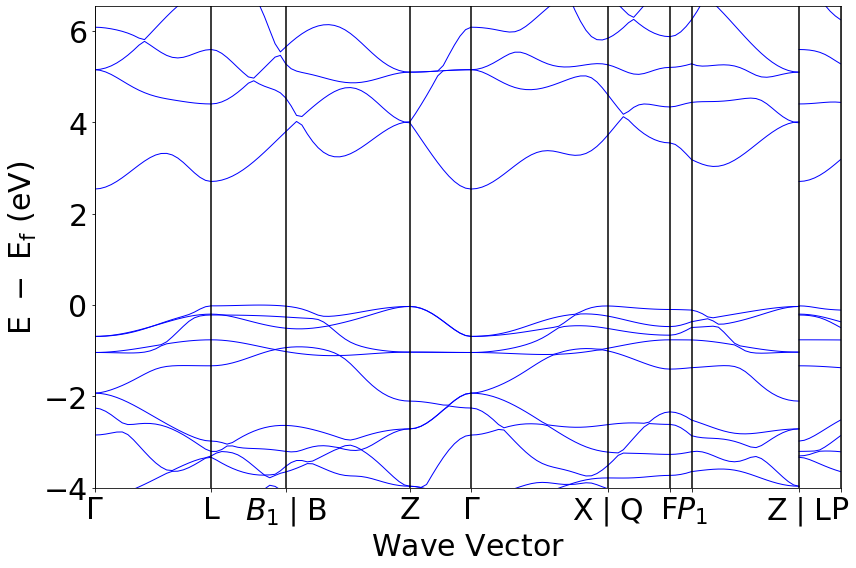

a dernière bande de valence est : [-0.6866999999999999, -0.6841999999999999, -0.6765999999999999, -0.6642999999999999, -0.6476, -0.6268999999999998, -0.6025999999999998, -0.5751, -0.5449999999999999, -0.5126, -0.47839999999999994, -0.43979999999999997, -0.3978999999999999, -0.3568999999999998, -0.3175999999999999, -0.28069999999999995, -0.24520000000000008, -0.20679999999999987, -0.15379999999999994, -0.08800000000000008, -0.03639999999999999, -0.01739999999999986]


La première bande de conduction est : [2.5410000000000004, 2.5523, 2.5854, 2.6382000000000003, 2.7075000000000005, 2.7894000000000005, 2.8795, 2.9733, 3.0662000000000003, 3.1531000000000002, 3.2286, 3.2864000000000004, 3.3196000000000003, 3.3217, 3.2883000000000004, 3.2199, 3.123, 3.0098000000000003, 2.8956999999999997, 2.7974000000000006, 2.7306, 2.7069]


La première bande de conduction est la première juste au dessus de 2.5410000000000004 eV.
La dernière bande de valence est donc juste celle en dessous.


In [50]:
#détermination de la dernière bande de valence et de la première bande de conduction
bandsplot = BSPlotter(bandstructure)

bandsplot.show() 

xy = bandsplot.bs_plot_data()
z = xy.get('energy')

#dernière bande de valence
print("a dernière bande de valence est :", z[0].get('1')[18])
print("\n")
#première bande de conduction
print("La première bande de conduction est :", z[0].get('1')[19])
print("\n")
print("La première bande de conduction est la première juste au dessus de", energy, "eV.")
print("La dernière bande de valence est donc juste celle en dessous.")

#for i in range(0,len(z[0].get('1'))):
#    if z[0].get('1')[i][0]>2.0:
#        cond=i
#        break
#print(i)

c=xy.get('ticks').get('label')
#print(c)

In [51]:
#détermination des distances entre branches
a = xy.get('ticks')
dist = a.get('distance')
print(dist)
print("\n")
print("On remarque qu'il y a des redondances dans les distances, donc il ne faudra pas en tenir compte dans les calculs suivants.")
print("\n")

dist1 = dist[1]-dist[0]    #entre Gamma et L
dist2 = dist[3]-dist[1]    #entre L et B1|B
dist3 = dist[4]-dist[3]    #entre B1|B et Z
dist4 = dist[6]-dist[4]    #entre Z et Gamma
dist5 = dist[8]-dist[6]    #entre Gamma et X|Q
dist6 = dist[9]-dist[8]    #entre X|Q et F
dist7 = dist[11]-dist[9]   #entre F et P1
dist8 = dist[13]-dist[11]  #entre P1 et Z|L
dist9 = dist[14]-dist[13]  #entre Z|L et P

[0.0, 1.042947319396385, 1.042947319396385, 1.711040369613415, 2.8213743787105123, 2.8213743787105123, 3.3702332139606868, 3.3702332139606868, 4.593493250941996, 5.148660180478935, 5.148660180478935, 5.342883117012484, 5.342883117012484, 6.304460639419871, 6.676129691107183]


On remarque qu'il y a des redondances dans les distances, donc il ne faudra pas en tenir compte dans les calculs suivants.




In [52]:
#calcul des différences d'énergies

#entre Gamma et L
EC1=(xy.get('energy')[0].get('1')[19])[len((xy.get('energy')[0].get('1')[19]))-1] - (xy.get('energy')[0].get('1')[19])[0]
EV1=(xy.get('energy')[0].get('1')[18])[len((xy.get('energy')[0].get('1')[18]))-1] - (xy.get('energy')[0].get('1')[18])[0]

#print(EC1)
#print(EV1)

#entre L et B1|B
EC2=(xy.get('energy')[1].get('1')[19])[len((xy.get('energy')[1].get('1')[19]))-1] - (xy.get('energy')[1].get('1')[19])[0]
EV2=(xy.get('energy')[1].get('1')[18])[len((xy.get('energy')[1].get('1')[18]))-1] - (xy.get('energy')[1].get('1')[18])[0]

#entre B1|B et Z
EC3=(xy.get('energy')[2].get('1')[19])[len((xy.get('energy')[2].get('1')[19]))-1] - (xy.get('energy')[2].get('1')[19])[0]
EV3=(xy.get('energy')[2].get('1')[18])[len((xy.get('energy')[2].get('1')[18]))-1] - (xy.get('energy')[2].get('1')[18])[0]

#entre Z et Gamma
EC4=(xy.get('energy')[3].get('1')[19])[len((xy.get('energy')[3].get('1')[19]))-1] - (xy.get('energy')[3].get('1')[19])[0]
EV4=(xy.get('energy')[3].get('1')[18])[len((xy.get('energy')[3].get('1')[18]))-1] - (xy.get('energy')[3].get('1')[18])[0]

#entre Gamma et X|Q
EC5=(xy.get('energy')[4].get('1')[19])[len((xy.get('energy')[4].get('1')[19]))-1] - (xy.get('energy')[4].get('1')[19])[0]
EV5=(xy.get('energy')[4].get('1')[18])[len((xy.get('energy')[4].get('1')[18]))-1] - (xy.get('energy')[4].get('1')[18])[0]

#entre X|Q et F
EC6=(xy.get('energy')[5].get('1')[19])[len((xy.get('energy')[5].get('1')[19]))-1] - (xy.get('energy')[5].get('1')[19])[0]
EV6=(xy.get('energy')[5].get('1')[18])[len((xy.get('energy')[5].get('1')[18]))-1] - (xy.get('energy')[5].get('1')[18])[0]

#entre F et P1
EC7=(xy.get('energy')[6].get('1')[19])[len((xy.get('energy')[6].get('1')[19]))-1] - (xy.get('energy')[6].get('1')[19])[0]
EV7=(xy.get('energy')[6].get('1')[18])[len((xy.get('energy')[6].get('1')[18]))-1] - (xy.get('energy')[6].get('1')[18])[0]

#entre P1 et Z|L
EC8=(xy.get('energy')[7].get('1')[19])[len((xy.get('energy')[7].get('1')[19]))-1] - (xy.get('energy')[7].get('1')[19])[0]
EV8=(xy.get('energy')[7].get('1')[18])[len((xy.get('energy')[7].get('1')[18]))-1] - (xy.get('energy')[7].get('1')[18])[0]

#entre Z|L et P
EC9=(xy.get('energy')[8].get('1')[19])[len((xy.get('energy')[8].get('1')[19]))-1] - (xy.get('energy')[8].get('1')[19])[0]
EV9=(xy.get('energy')[8].get('1')[18])[len((xy.get('energy')[8].get('1')[18]))-1] - (xy.get('energy')[8].get('1')[18])[0]


In [53]:
#calcul des pentes des deux bandes pour les 8

#entre Gamma et L
PC1=EC1/dist1
PV1=EV1/dist1

#print(PC1)
#print(PV1)

#entre L et B1|B
PC2=EC2/dist2
PV2=EV2/dist2

#entre B1|B et Z
PC3=EC3/dist3
PV3=EV3/dist3

#entre Z et Gamma
PC4=EC4/dist4
PV4=EV4/dist4

#entre Gamma et X|Q
PC5=EC5/dist5
PV5=EV5/dist5

#entre X|Q et F
PC6=EC6/dist6
PV6=EV6/dist6

#entre F et P1
PC7=EC7/dist7
PV7=EV7/dist7

#entre P1 et Z|L
PC8=EC8/dist8
PV8=EV8/dist8

#entre Z|L et P
PC9=EC9/dist9
PV9=EV9/dist9

PC=np.array([PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9])
PV=np.array([PV1, PV2, PV3, PV4, PV5, PV6, PV7, PV8, PV9])

print(PC)
print(PV)
print('\n')

MaxPC=np.amax(PC)
MinPC=np.amin(PC)
MaxPV=np.amax(PV)
MinPV=np.amin(PV)

print("Le maximum de dispersion de la bande de conduction est", MaxPC, "dans la direction L-B1|B.")
print("Le minimum de dispersion de la bande de conduction est", MinPC, "dans la direction Z-Gamma.")
print("Le maximum de dispersion de la bande de valence est", MaxPV, "dans la direction Gamma-L.")
print("Le minimum de dispersion de la bande de valence est", MinPV, "dans la direction Z-Gamma.")

[ 0.15906844  1.63255702  0.17625327 -2.64603557  0.96545294 -0.30747509
 -1.88185807  0.83976589  1.28851191]
[ 0.64173903 -0.00928014 -0.00639447 -1.19520714  0.54526428 -0.13905727
 -0.06590365  0.08215666 -0.24833921]


Le maximum de dispersion de la bande de conduction est 1.6325570212797242 dans la direction L-B1|B.
Le minimum de dispersion de la bande de conduction est -2.646035568213145 dans la direction Z-Gamma.
Le maximum de dispersion de la bande de valence est 0.6417390289543707 dans la direction Gamma-L.
Le minimum de dispersion de la bande de valence est -1.1952071422900383 dans la direction Z-Gamma.
